In [1]:
using JuMP, Plots, PyCall, CPLEX

In [2]:
pushfirst!(PyVector(pyimport("sys")."path"), "")
init  = pyimport("__init__")

PyObject <module '__init__' from '/home/harcenage/Documents/CLSPM/julia/__init__.py'>

In [17]:
include("./genetic_algorithm.jl")

genetic_algorithm (generic function with 1 method)

In [18]:
p = 10
t = 15
version = 1
println("p = ", p)
println("t = ", t)
file_path = "instances/rd_instance" * string(p) * "_" * string(t) * "_" * string(version) *".txt";
instance_dict = init.gen_instance(p,t, fp=file_path); 
instance_dict["P"] = 1:p;
instance_dict["T"] = 1:t;
instance_dict["t"] = t
instance_dict["p"] = p
alpha = instance_dict["alpha"]
cmax = instance_dict["cmax"]

p = 10
t = 15


450

In [20]:
len_pop = 200
@time current_pop, model1 = generate_pop_initial(len_pop,instance_dict);
print_pop(current_pop)   

  0.130348 seconds (1.19 M allocations: 31.711 MiB)
Any[178973.30933333334, 183650.6666666667, 155368.0, 190677.33333333334, 181264.33333333337, 161152.6666666667, 207907.94560838182, 154900.0, 177668.33333333337, 160442.6666666667, 199339.82080000002, 165118.92320000002, 185570.6666666667, 158097.3504, 160554.6666666667, 156116.16, 202331.6666666667, 157276.7008, 223049.6666666667, 187881.50199466667, 182139.33333333337, 162697.45333333334, 228048.00000000003, 189115.69706666667, 173812.33333333337, 153650.0, 166568.33333333337, 219504.49333333335, 156765.0, 151699.08000000002, 168595.33333333337, 153937.56, 160395.72, 165613.0, 169316.6666666667, 154725.0, 160880.0, 207525.6666666667, 199068.6666666667, 187145.7466666667, 155555.0256, 150790.0, 147774.0, 150711.04, 188235.41333333333, 203987.6666666667, 166338.33333333334, 187871.33333333337, 198110.6666666667, 175703.6666666667, 152547.16, 152362.3632, 166209.6666666667, 194920.6666666667, 210414.08, 216547.68800000002, 155505.0, 19

In [27]:
sol1, sol2 = current_pop[1], current_pop[2]
list_fils_z, list_fils_y = crossover(sol1, sol2, instance_dict);
list_fils_sol = []
for fils_z in list_fils_z
    fils_c = construct_capacities(fils_z, t, alpha, cmax)  
    for fils_y in list_fils_y
        fils_sol, model1 = create_solution(model1,fils_y,fils_z,fils_c,instance_dict)
        push!(list_fils_sol, fils_sol)
    end
end

In [53]:
print("x parent1 : ")
display(transpose(sol1.x))
print("x parent2 : ")
display(transpose(sol2.x))
print("x fils1 : ")
display(transpose(list_fils_sol[1].x))

x parent1 : 

15×10 transpose(::Matrix{Float64}) with eltype Float64:
 135.0   37.0  39.0   80.0   68.0   18.0    0.0  48.0   0.0     99.0
   0.0   23.0  31.0    0.0    0.0  135.0   21.0  40.0  78.0      0.0
   0.0   49.0   4.0    0.0   34.0    0.0   18.0  46.0   0.0      0.0
   0.0    0.0  83.0   36.0   60.0    0.0   51.0   0.0   0.0     34.0
   0.0   42.0   0.0    0.0    0.0    0.0    0.0  89.0   0.0      0.0
   0.0   70.0  26.0  106.0   15.0   34.0  100.0   0.0  19.0      0.0
  12.0    0.0   0.0    0.0   26.0    0.0    0.0   0.0   0.0     66.0
  28.0    0.0   0.0    0.0  144.0   65.0    0.0   1.0  38.0      0.0
  49.0   67.0  27.0   47.0    0.0    0.0    0.0  39.0  42.8576  44.0
  17.0    0.0  70.0   30.0    0.0   97.0  103.0   0.0  20.1424  11.3376
   5.0  137.0   0.0    0.0    0.0    0.0    0.0  67.0  91.0      6.6624
  29.0    0.0   0.0   14.0    0.0    0.0    0.0   0.0   0.0     70.0
   0.0    0.0   0.0    0.0    0.0   94.0   56.0   0.0   0.0      0.0
   0.0    0.0  27.0   72.0   37.0    0.0 

x parent2 : 

15×10 transpose(::Matrix{Float64}) with eltype Float64:
 41.0  105.0  70.0   46.0   39.0   18.0   0.0  134.0    0.0   79.0
  0.0    0.0   0.0   67.0   63.0   67.0  21.0    0.0   13.0    0.0
  0.0    0.0  87.0    0.0    0.0    0.0  82.0    0.0   65.0   34.0
 83.0   46.0   0.0    0.0  101.0  143.0  23.0    0.0    0.0    0.0
  0.0    0.0   0.0   81.0    0.0    0.0   0.0   36.0    0.0    0.0
 11.0   52.0   0.0    0.0    0.0    0.0   0.0   53.0   19.0   20.0
 40.0    0.0  23.0    0.0    0.0    0.0  38.0    0.0    0.0  128.0
  0.0   56.0  30.0  105.0    4.0    0.0   6.0    1.0  150.0    0.0
 66.0   29.0   0.0    0.0  117.0   24.0  65.0   95.0    0.0    0.0
  0.0    0.0  23.0    0.0    0.0   97.0   0.0    0.0    0.0    0.0
 16.0   28.0   0.0    0.0    0.0    0.0  48.0    0.0    0.0    0.0
  0.0   47.0  16.0    3.0   23.0    0.0  82.0    0.0    0.0   40.0
 11.0   62.0  87.0   83.0    0.0   47.0   0.0    1.0   42.0   21.0
 11.0    0.0   0.0    0.0   37.0   47.0   0.0   10.0   94.0    9.0
  0.0 

x fils1 : 

15×10 transpose(::Matrix{Float64}) with eltype Float64:
 124.0  37.0  39.0   80.0  102.0   18.0    0.0  48.0     0.0   79.0
   0.0  23.0  31.0    0.0    0.0  135.0   21.0  86.0    78.0    0.0
   0.0  45.0   4.0    0.0    0.0    0.0   18.0   0.0     0.0   34.0
   0.0  46.0  83.0   36.0  101.0    0.0   51.0   0.0     0.0    0.0
   0.0   0.0   0.0    0.0    0.0    0.0    0.0  54.52    0.0    0.0
  11.0  52.0   0.0   78.0    0.0   34.0  100.0  34.48   19.0   20.0
  40.0   0.0  23.0    0.0    0.0    0.0    0.0   0.0     0.0  110.0
   0.0  18.0  30.0  101.0    4.0   41.0    0.0   1.0   150.0    0.0
  66.0  67.0   0.0    4.0  140.0   24.0    0.0  95.0     0.0    0.0
   0.0   0.0  70.0    0.0    0.0   97.0   45.0   0.0     0.0    0.0
  16.0  28.0   0.0    0.0    0.0    0.0   58.0   0.0     0.0   18.0
   0.0  47.0   0.0    3.0    0.0    0.0    0.0   0.0     0.0   70.0
  11.0  62.0   0.0   83.0    0.0   94.0   56.0  11.0    42.0    0.0
  11.0   0.0  27.0    0.0   37.0    0.0    0.0   0.0    94.0

In [57]:
fils_z, fils_y = mutation(sol1,instance_dict, false, 0.1)
fils_c = construct_capacities(fils_z, t, alpha, cmax) 
fils_sol, model1 = create_solution(model1,fils_y,fils_z,fils_c,instance_dict);
                    

In [58]:
print("x parent1 : ")
display(transpose(sol1.x))
print("x fils : ")
display(transpose(fils_sol.x))  

x parent1 : 

15×10 transpose(::Matrix{Float64}) with eltype Float64:
 135.0   37.0  39.0   80.0   68.0   18.0    0.0  48.0   0.0     99.0
   0.0   23.0  31.0    0.0    0.0  135.0   21.0  40.0  78.0      0.0
   0.0   49.0   4.0    0.0   34.0    0.0   18.0  46.0   0.0      0.0
   0.0    0.0  83.0   36.0   60.0    0.0   51.0   0.0   0.0     34.0
   0.0   42.0   0.0    0.0    0.0    0.0    0.0  89.0   0.0      0.0
   0.0   70.0  26.0  106.0   15.0   34.0  100.0   0.0  19.0      0.0
  12.0    0.0   0.0    0.0   26.0    0.0    0.0   0.0   0.0     66.0
  28.0    0.0   0.0    0.0  144.0   65.0    0.0   1.0  38.0      0.0
  49.0   67.0  27.0   47.0    0.0    0.0    0.0  39.0  42.8576  44.0
  17.0    0.0  70.0   30.0    0.0   97.0  103.0   0.0  20.1424  11.3376
   5.0  137.0   0.0    0.0    0.0    0.0    0.0  67.0  91.0      6.6624
  29.0    0.0   0.0   14.0    0.0    0.0    0.0   0.0   0.0     70.0
   0.0    0.0   0.0    0.0    0.0   94.0   56.0   0.0   0.0      0.0
   0.0    0.0  27.0   72.0   37.0    0.0 

x fils : 

15×10 transpose(::Matrix{Float64}) with eltype Float64:
 135.0      37.0  39.0   80.0   68.0   18.0   21.0  48.0   0.0  99.0
   0.0      23.0  31.0    0.0    0.0  135.0    0.0  40.0  78.0   0.0
   0.0      49.0   4.0    0.0   34.0    0.0   18.0  82.0   0.0   0.0
   0.0       0.0  83.0   36.0   60.0    0.0   23.0   0.0   0.0  62.0
   0.0      42.0   0.0    0.0    0.0    0.0   64.0   0.0   0.0   0.0
   0.0      91.0  26.0  106.0   41.0   34.0    0.0  54.0  57.0   0.0
  12.0       0.0   0.0    0.0    0.0    0.0  109.0   0.0   0.0   0.0
  28.0       0.0   0.0    0.0    4.0  114.0    0.0   0.0   0.0  82.0
  49.0       0.0  27.0   77.0  177.0    0.0    0.0  33.0  26.0   0.0
  17.0      74.0  70.0    0.0    0.0    0.0    0.0   6.0  37.0   0.0
  25.3376    0.0   0.0    0.0    0.0   95.0   48.0  67.0  44.0  58.0
  12.6624  140.0   0.0    3.0    0.0    0.0   59.0   0.0  92.0   0.0
   0.0       0.0   0.0   56.0    0.0    0.0    0.0   0.0   0.0  34.0
   0.0       0.0  56.0    0.0    0.0   82.0   2

In [45]:
function compare(x,y,z, instance_dict)
    P = instance_dict["P"]
    T = instance_dict["T"]   
    cmp = zeros(Int64,p,t)
    for i in P
        for j in T
            if x[i,j] == z[i,j] || y[i,j] == z[i,j]
                cmp[i,j] = 1
            end 
        end
    end 
    return cmp
end 

compare (generic function with 3 methods)

In [49]:
cmp = compare(sol1.x, sol2.x, list_fils_sol[1].x, instance_dict)

println(sum(cmp))   
display(cmp)

133


10×15 Matrix{Int64}:
 0  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  0  1  1  1  1  0  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  0  1  0  0  1  1  1  1  1  1
 0  1  1  1  1  1  1  1  0  1  1  1  1  1  1
 1  1  1  1  1  1  1  0  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  0  0  1  1  1  1
 1  0  1  1  0  0  1  1  1  1  1  1  0  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  0  1  1  1  0  1  1  1  1

In [25]:
len_pop = 200
nbr_iteration = 200
rst = true
@time begin
    result = genetic_algorithm(instance_dict, len_pop, nbr_iteration, rst);
end
objectives, snd_objectives = result["objectives"], result["snd_objectives"]
trd_objectives, best_sol = result["trd_objectives"], result["best_sol"]

--------------------------Itération 0 --------------------------
  0.115815 seconds (1.17 M allocations: 31.325 MiB)
165019.0
--------------------------Itération 1 --------------------------
CROSSOVER
  0.252384 seconds (1.65 M allocations: 38.994 MiB, 24.21% gc time, 15.48% compilation time)
MUTATION
  0.183436 seconds (441.18 k allocations: 10.335 MiB, 78.66% compilation time)

best_sol = 154706.0

--------------------------Itération 2 --------------------------
CROSSOVER
  0.154220 seconds (1.61 M allocations: 37.142 MiB)
MUTATION
  0.041545 seconds (437.25 k allocations: 10.157 MiB)

best_sol = 152909.0

--------------------------Itération 3 --------------------------
CROSSOVER
  0.145598 seconds (1.60 M allocations: 36.863 MiB)
MUTATION
  0.039054 seconds (436.68 k allocations: 10.143 MiB)

best_sol = 149408.0

--------------------------Itération 4 --------------------------
CROSSOVER
  0.166347 seconds (1.61 M allocations: 37.187 MiB, 17.81% gc time)
MUTATION
  0.036777 seconds (

  0.107977 seconds (1.05 M allocations: 24.917 MiB)
MUTATION
  0.067110 seconds (412.53 k allocations: 9.625 MiB)

best_sol = 108145.7228224471

--------------------------Itération 38 --------------------------
CROSSOVER
  0.113779 seconds (1.14 M allocations: 26.824 MiB)
MUTATION
  0.067322 seconds (427.12 k allocations: 9.938 MiB)

best_sol = 108145.7228224471

--------------------------Itération 39 --------------------------
CROSSOVER
  0.130743 seconds (1.08 M allocations: 25.488 MiB, 15.52% gc time)
MUTATION
  0.064427 seconds (413.06 k allocations: 9.625 MiB)

best_sol = 107847.4626509824

--------------------------Itération 40 --------------------------
CROSSOVER
  0.092089 seconds (981.70 k allocations: 23.311 MiB)
MUTATION
  0.064449 seconds (423.70 k allocations: 9.894 MiB)

best_sol = 107484.48233216

--------------------------Itération 41 --------------------------
CROSSOVER
  0.091565 seconds (978.07 k allocations: 23.255 MiB)
MUTATION
  0.062597 seconds (416.13 k allocati

  0.204348 seconds (1.52 M allocations: 35.213 MiB)
MUTATION
  0.055056 seconds (354.63 k allocations: 8.208 MiB)

best_sol = 106005.81415153254

--------------------------Itération 68 --------------------------
CROSSOVER
  0.159343 seconds (1.56 M allocations: 36.110 MiB)
MUTATION
  0.066016 seconds (426.30 k allocations: 9.866 MiB)

best_sol = 106005.81415153254

--------------------------Itération 69 --------------------------
CROSSOVER
  0.144573 seconds (1.51 M allocations: 35.160 MiB)
MUTATION
  0.090323 seconds (425.57 k allocations: 9.921 MiB, 28.66% gc time)

best_sol = 106005.81415153254

--------------------------Itération 70 --------------------------
CROSSOVER
  0.103655 seconds (1.33 M allocations: 31.315 MiB)
MUTATION
  0.063366 seconds (420.93 k allocations: 9.858 MiB)

best_sol = 106005.81415153254

--------------------------Itération 71 --------------------------
CROSSOVER
  0.081325 seconds (949.95 k allocations: 22.826 MiB)
MUTATION
  0.063713 seconds (413.84 k allo

Any[107149.07239153254, 107151.07239153254, 107218.07239153254, 107221.74176, 107390.03068416001, 107471.74176, 107612.782144, 107719.74176, 107755.74176, 107810.74176, 107876.12738816, 108054.03068416001, 108082.38175999999, 108130.74176, 108133.03068416001, 108141.38562816, 108168.03068416001, 108239.74176, 108299.03068416001, 108411.03068416001, 108828.27216195174, 108938.07239153254, 108973.07239153254, 109046.75605801778, 109084.74176, 109121.74176, 109189.07239153254, 109373.07239153254, 109393.74176, 109412.95961600001, 109440.26579953254, 109532.38175999999, 109599.74176, 109648.07239153254, 109747.07239153254, 109840.62074353255, 109855.07239153254, 109861.81415153254, 109888.07239153254, 109989.07239153254, 110004.07239153254, 110018.81415153254, 110030.16909553255, 110526.74176, 110673.74176, 110698.08254976, 110745.74176, 110756.74176, 110854.74176, 133048.24785166408, 134700.33619411624, 135901.64633143356, 139907.6141263995, 141757.10821397498, 141972.43766826607, 142394.

  0.071730 seconds (772.67 k allocations: 18.877 MiB)
MUTATION
  0.063270 seconds (409.08 k allocations: 9.673 MiB)

best_sol = 105087.45473780122

--------------------------Itération 126 --------------------------
CROSSOVER
  0.073681 seconds (772.03 k allocations: 18.867 MiB)
MUTATION
  0.087341 seconds (407.54 k allocations: 9.630 MiB, 23.37% gc time)

best_sol = 105087.45473780122

--------------------------Itération 127 --------------------------
CROSSOVER
  0.067066 seconds (774.24 k allocations: 18.900 MiB)
MUTATION
  0.062127 seconds (409.34 k allocations: 9.672 MiB)

best_sol = 105087.45473780122

--------------------------Itération 128 --------------------------
CROSSOVER
  0.065909 seconds (774.14 k allocations: 18.899 MiB)
MUTATION
  0.066519 seconds (408.90 k allocations: 9.678 MiB)

best_sol = 105087.45473780122

--------------------------Itération 129 --------------------------
CROSSOVER
  0.072581 seconds (772.99 k allocations: 18.882 MiB)
MUTATION
  0.067721 seconds (4

  0.237218 seconds (1.52 M allocations: 35.169 MiB, 8.62% gc time)
MUTATION
  0.042681 seconds (288.58 k allocations: 6.713 MiB)

best_sol = 105087.45473780122

--------------------------Itération 150 --------------------------
CROSSOVER
  0.186970 seconds (1.59 M allocations: 36.699 MiB)
MUTATION
  0.060985 seconds (414.59 k allocations: 9.617 MiB)

best_sol = 105087.45473780122

--------------------------Itération 151 --------------------------
CROSSOVER
  0.107880 seconds (1.26 M allocations: 29.377 MiB)
MUTATION
  0.055782 seconds (377.79 k allocations: 8.840 MiB)

best_sol = 105087.45473780122

--------------------------Itération 152 --------------------------
CROSSOVER
  0.109380 seconds (1.03 M allocations: 24.478 MiB, 17.62% gc time)
MUTATION
  0.053233 seconds (371.23 k allocations: 8.725 MiB)

best_sol = 105087.45473780122

--------------------------Itération 153 --------------------------
CROSSOVER
  0.072826 seconds (879.66 k allocations: 21.085 MiB)
MUTATION
  0.060930 sec

  0.057109 seconds (691.00 k allocations: 16.879 MiB)
MUTATION
  0.056378 seconds (364.18 k allocations: 8.624 MiB)

best_sol = 105053.34493302784

--------------------------Itération 186 --------------------------
CROSSOVER
  0.060985 seconds (689.15 k allocations: 16.851 MiB)
MUTATION
  0.054079 seconds (363.82 k allocations: 8.621 MiB)

best_sol = 105053.34493302784

--------------------------Itération 187 --------------------------
CROSSOVER
  0.061168 seconds (689.95 k allocations: 16.863 MiB)
MUTATION
  0.057585 seconds (363.69 k allocations: 8.626 MiB)

best_sol = 105053.34493302784

--------------------------Itération 188 --------------------------
CROSSOVER
  0.063555 seconds (691.32 k allocations: 16.885 MiB)
MUTATION
  0.077288 seconds (364.10 k allocations: 8.624 MiB, 24.88% gc time)

best_sol = 105053.34493302784

--------------------------Itération 189 --------------------------
CROSSOVER
  0.057217 seconds (680.48 k allocations: 16.616 MiB)
MUTATION
  0.051987 seconds (3

(Any[169659.0, 156715.0, 153887.12, 149981.27536384, 145737.0, 142752.0, 137431.2492644352, 135118.2238306304, 131763.09613004798, 130051.2652875776  …  105085.3176498012, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784, 105055.48202102784], solution([22.0 0.0 … 0.0 0.0; 60.0 0.0 … 0.0 0.0; … ; 0.0 41.0 … 94.0 0.0; 35.0 98.0 … 0.0 0.0], [6.0 0.0 … 4.0 0.0; 23.0 0.0 … 31.0 0.0; … ; 0.0 28.0 … 49.0 0.0; 0.0 54.0 … 4.0 0.0], [1 0 … 0 0; 1 0 … 0 0; … ; 1 1 … 1 0; 1 1 … 0 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [450.0, 396.0, 348.48, 306.6624, 269.862912, 237.47936256, 208.9818390528, 183.90401836646402, 450.0, 396.0, 348.48, 306.6624, 269.862912, 237.47936256, 208.9818390528], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 105053.34493302784))

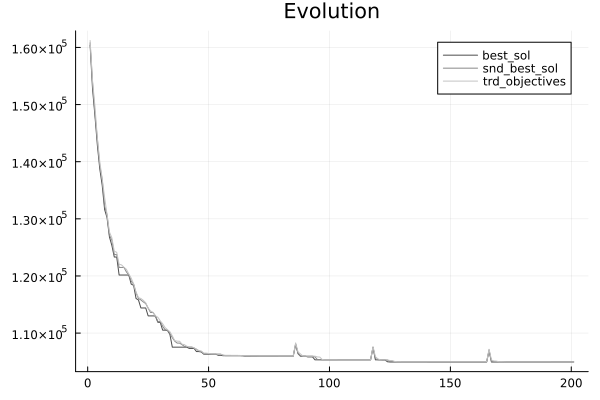

In [11]:
using Colors, ColorSchemes
mygrays = ColorScheme([RGB{Float64}(i, i, i) for i in 0.3:0.1:1.0])
len = length(objectives)
plot(1:len, [objectives,snd_objectives,trd_objectives], title="Evolution", label=["best_sol" "snd_best_sol" "trd_objectives"], lw=1; palette=palette(mygrays, 4))
#savefig("img.png")


In [13]:
println(best_sol.obj)
println(sum(best_sol.z))
l = []
for i in 1:p
    push!(l, sum(best_sol.y[i,:]))
end

println("Feasibility of solution : ", verify_solution(best_sol, instance_dict))
sz = best_sol.z
sc = construct_capacities(sz, t, alpha, cmax)
sy = best_sol.y
println("Maintenance : ",best_sol.z)
println("Surplus : ",best_sol.u) 
println("Matrice des setup : ")
display(best_sol.y)
println(l)


104941.77988177919
2
Feasibility of solution : true
Maintenance : [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Surplus : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Matrice des setup : 


10×15 Matrix{Int64}:
 1  0  1  0  1  0  0  0  1  0  0  1  0  0  0
 1  0  1  0  0  1  0  1  0  1  0  1  0  0  0
 1  1  0  1  0  0  0  0  1  0  0  0  1  0  0
 1  0  0  1  0  1  0  1  0  0  0  0  1  0  0
 1  1  1  0  0  1  0  1  0  1  0  0  0  1  0
 1  0  0  1  0  1  0  0  1  0  1  0  0  1  0
 1  1  0  1  0  0  1  0  0  1  0  0  1  0  0
 1  1  0  0  1  0  1  0  0  0  1  0  0  0  0
 1  0  0  0  1  0  0  0  1  0  1  0  0  1  0
 1  1  0  0  0  0  1  0  1  0  0  1  0  0  0

Any[5, 6, 5, 5, 7, 6, 6, 5, 5, 5]


In [ ]:
Any[5, 6, 4, 5, 6, 5, 5, 5, 6, 5]